# task 1.a

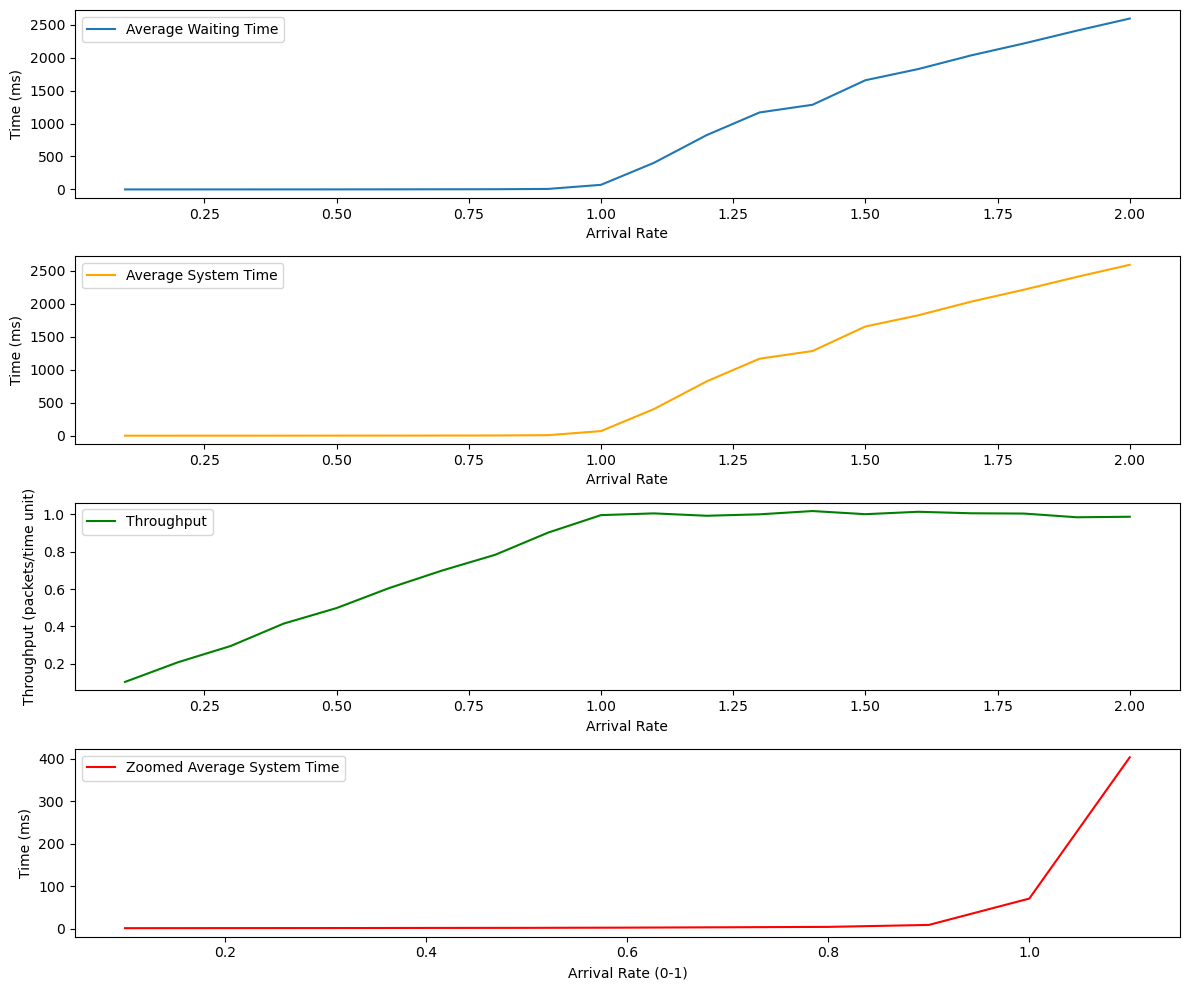

In [2]:
import simpy
import random
import matplotlib.pyplot as plt

# Parameters
SERVICE_RATE = 1.0  # Average service rate (packets per time unit)
SIM_TIME = 10000    # Simulation time

# Metrics
arrivals = 0
served = 0
total_waiting_time = 0
total_system_time = 0

class UAVBaseStation:
    def __init__(self, env, service_rate):
        self.env = env
        self.server = simpy.Resource(env, capacity=1)
        self.service_rate = service_rate

    def process_packet(self, packet):
        yield self.env.timeout(random.expovariate(self.service_rate))

def packet_generator(env, arrival_rate, uav_bs):
    global arrivals
    while True:
        yield env.timeout(random.expovariate(arrival_rate))
        env.process(handle_packet(env, uav_bs))
        arrivals += 1

def handle_packet(env, uav_bs):
    global served, total_waiting_time, total_system_time
    arrival_time = env.now
    with uav_bs.server.request() as request:
        yield request
        waiting_time = env.now - arrival_time
        total_waiting_time += waiting_time
        yield env.process(uav_bs.process_packet(None))
        system_time = env.now - arrival_time
        total_system_time += system_time
        served += 1

def run_simulation(arrival_rate):
    global arrivals, served, total_waiting_time, total_system_time
    arrivals, served = 0, 0
    total_waiting_time, total_system_time = 0, 0

    env = simpy.Environment()
    uav_bs = UAVBaseStation(env, SERVICE_RATE)
    env.process(packet_generator(env, arrival_rate, uav_bs))
    env.run(until=SIM_TIME)

    avg_waiting_time = total_waiting_time / served if served > 0 else float('inf')
    avg_system_time = total_system_time / served if served > 0 else float('inf')
    return avg_waiting_time, avg_system_time, arrivals, served

# Vary arrival rate and plot performance metrics
arrival_rates = [0.1 * i for i in range(1, 21)]
avg_waiting_times = []
avg_system_times = []
throughputs = []

for rate in arrival_rates:
    avg_waiting_time, avg_system_time, arrivals, served = run_simulation(rate)
    avg_waiting_times.append(avg_waiting_time)
    avg_system_times.append(avg_system_time)
    throughputs.append(served / SIM_TIME)

# Plotting the results
# plt.figure(figsize=(12, 8))

# plt.subplot(3, 1, 1)
# plt.plot(arrival_rates, avg_waiting_times, label='Average Waiting Time')
# plt.xlabel('Arrival Rate')
# plt.ylabel('Time')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.plot(arrival_rates, avg_system_times, label='Average System Time', color='orange')
# plt.xlabel('Arrival Rate')
# plt.ylabel('Time')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.plot(arrival_rates, throughputs, label='Throughput', color='green')
# plt.xlabel('Arrival Rate')
# plt.ylabel('Throughput (packets/time unit)')
# plt.legend()

# plt.tight_layout()
# plt.show()

# Plotting the results
plt.figure(figsize=(12, 10))

# Plot 1: Average Waiting Time
plt.subplot(4, 1, 1)
plt.plot(arrival_rates, avg_waiting_times, label='Average Waiting Time')
plt.xlabel('Arrival Rate')
plt.ylabel('Time (ms)')
plt.legend()

# Plot 2: Average System Time
plt.subplot(4, 1, 2)
plt.plot(arrival_rates, avg_system_times, label='Average System Time', color='orange')
plt.xlabel('Arrival Rate')
plt.ylabel('Time (ms)')
plt.legend()

# Plot 3: Throughput
plt.subplot(4, 1, 3)
plt.plot(arrival_rates, throughputs, label='Throughput', color='green')
plt.xlabel('Arrival Rate')
plt.ylabel('Throughput (packets/time unit)')
plt.legend()

# Plot 4: Zoomed Average System Time
plt.subplot(4, 1, 4)
plt.plot(arrival_rates[:11], avg_system_times[:11], label='Zoomed Average System Time', color='red')  # Adjusted range for zooming in
plt.xlabel('Arrival Rate (0-1)')
plt.ylabel('Time (ms)')
plt.legend()

plt.tight_layout()
plt.show()


# task 1.b

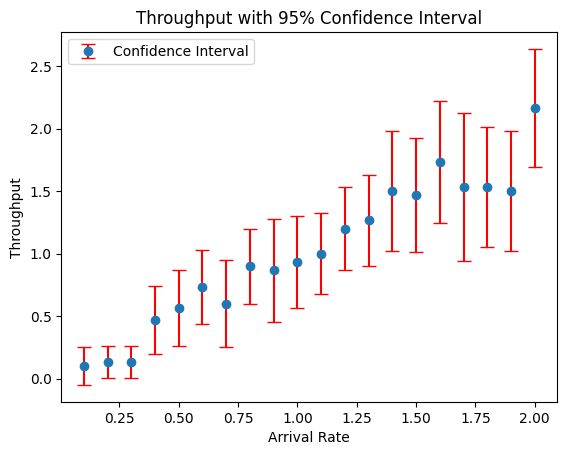

In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = scipy.stats.sem(data)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, interval

# Placeholder for the simulation function
def run_simulation(rate):
    # This function should return throughput based on the arrival rate
    # For example, it can return (throughput, other_metrics...)
    throughput = np.random.poisson(rate)  # Placeholder for actual throughput calculation
    return throughput, None, None, None

# Sample arrival rates
#arrival_rates = np.linspace(1, 10, 10)  # Example arrival rates from 1 to 10
arrival_rates = [0.1 * i for i in range(1, 21)]

# Collect data for confidence intervals
throughput_ci = []

for rate in arrival_rates:
    throughputs = []
    for _ in range(30):  # Run multiple simulations for each rate
        throughput, _, _, _ = run_simulation(rate)
        throughputs.append(throughput)
    mean, interval = confidence_interval(throughputs)
    throughput_ci.append((mean, interval))

# Plotting confidence intervals
means = [x[0] for x in throughput_ci]
intervals = [x[1] for x in throughput_ci]

plt.errorbar(arrival_rates, means, yerr=intervals, fmt='o', ecolor='r', capsize=5, label='Confidence Interval')
plt.xlabel('Arrival Rate')
plt.ylabel('Throughput')
plt.title('Throughput with 95% Confidence Interval')
plt.legend()
plt.show()


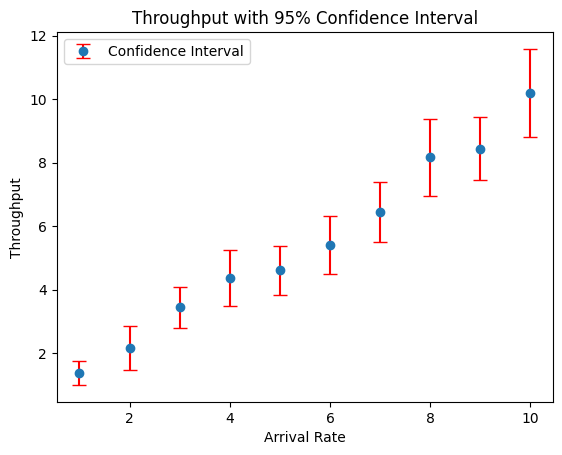

In [4]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = scipy.stats.sem(data)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, interval

# Placeholder for the simulation function
def run_simulation(rate):
    # This function should return throughput based on the arrival rate
    # For example, it can return (throughput, other_metrics...)
    throughput = np.random.poisson(rate)  # Placeholder for actual throughput calculation
    return throughput, None, None, None

# Sample arrival rates
arrival_rates = np.linspace(1, 10, 10)  # Example arrival rates from 1 to 10

# Collect data for confidence intervals
throughput_ci = []

for rate in arrival_rates:
    throughputs = []
    for _ in range(30):  # Run multiple simulations for each rate
        throughput, _, _, _ = run_simulation(rate)
        throughputs.append(throughput)
    mean, interval = confidence_interval(throughputs)
    throughput_ci.append((mean, interval))

# Plotting confidence intervals
means = [x[0] for x in throughput_ci]
intervals = [x[1] for x in throughput_ci]

plt.errorbar(arrival_rates, means, yerr=intervals, fmt='o', ecolor='r', capsize=5, label='Confidence Interval')
plt.xlabel('Arrival Rate')
plt.ylabel('Throughput')
plt.title('Throughput with 95% Confidence Interval')
plt.legend()
plt.show()


# task 2.a

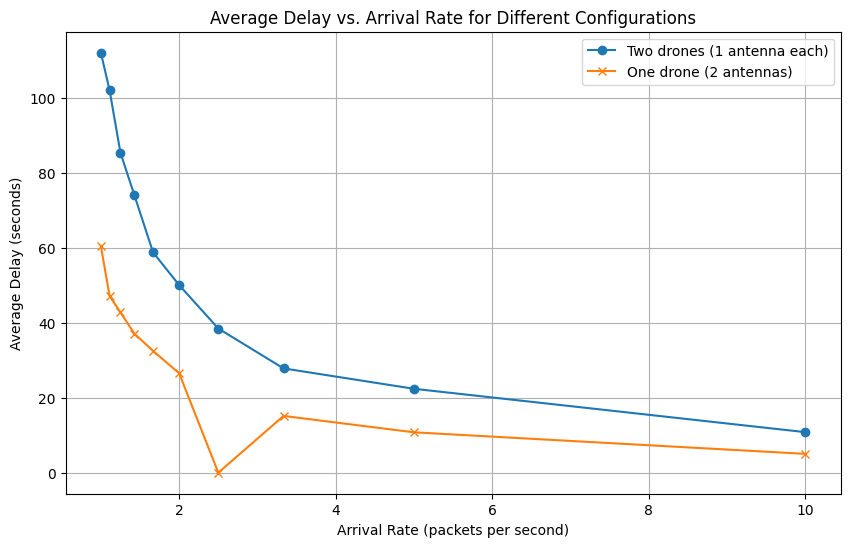

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Constants
SERVICE_RATE = 10       # Average packets served per second
SIMULATION_TIME = 1000  # Total simulation time in seconds

# Function to simulate and calculate average delay
def simulate_average_delay(arrival_rate, service_rate, simulation_time):
    current_time = 0
    next_service_time = float('inf')
    next_arrival_time = expon.rvs(scale=1/arrival_rate)
    packets = []
    total_delay = 0

    while current_time < simulation_time:
        if next_arrival_time < next_service_time:  # Arrival event
            current_time = next_arrival_time
            packets.append(current_time)
            if next_service_time == float('inf'):  # Server is idle
                next_service_time = current_time + expon.rvs(scale=1/service_rate)
            next_arrival_time += expon.rvs(scale=1/arrival_rate)
        else:  # Service event
            current_time = next_service_time
            if packets:
                packet_arrival = packets.pop(0)
                total_delay += current_time - packet_arrival
            if packets:  # More packets are waiting
                next_service_time = current_time + expon.rvs(scale=1/service_rate)
            else:
                next_service_time = float('inf')

    average_delay = total_delay / len(packets) if packets else 0
    return average_delay

# Define a range of interarrival rates
interarrival_rates = np.linspace(0.1, 1, 10)  # From 10 packets/sec to 1 packet/sec
average_delays_1 = []
average_delays_2 = []

# Simulate for two configurations
for rate in interarrival_rates:
    average_delays_1.append(simulate_average_delay(rate, SERVICE_RATE, SIMULATION_TIME))
    average_delays_2.append(simulate_average_delay(rate, SERVICE_RATE*2, SIMULATION_TIME))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(1/interarrival_rates, average_delays_1, label='Two drones (1 antenna each)', marker='o')
plt.plot(1/interarrival_rates, average_delays_2, label='One drone (2 antennas)', marker='x')
plt.xlabel('Arrival Rate (packets per second)')
plt.ylabel('Average Delay (seconds)')
plt.title('Average Delay vs. Arrival Rate for Different Configurations')
plt.legend()
plt.grid(True)
plt.show()


# task 2.b

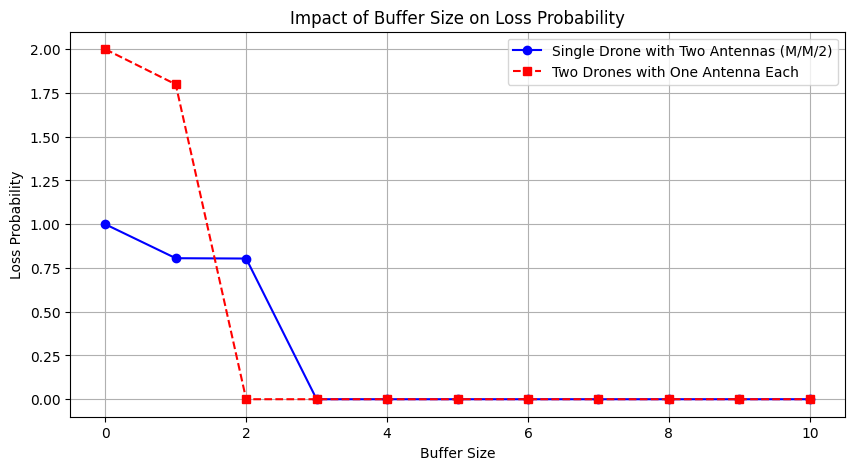

In [3]:
import random
import simpy
import matplotlib.pyplot as plt

# Constants
SERVICE = 10.0  # Average service time
ARRIVAL = 1.0   # Average inter-arrival time
SIM_TIME = 100000  # Shortened for quicker simulation runs
BUFFER_SIZES = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Different buffer sizes for comparison

# To collect results
loss_probabilities_mm2 = []
loss_probabilities_mm1 = []

def arrival_process(environment, server, buffer_size):
    while True:
        yield environment.timeout(random.expovariate(1.0 / ARRIVAL))
        environment.total_arrivals += 1
        if len(server.items) < buffer_size:
            yield server.put(1)  # '1' represents a packet
        else:
            environment.losses += 1  # Increment loss if buffer is full

def service_process(environment, server):
    while True:
        packet = yield server.get()
        yield environment.timeout(random.expovariate(1.0 / SERVICE))

def run_simulation(buffer_size, num_servers):
    env = simpy.Environment()
    server = simpy.FilterStore(env, capacity=num_servers)
    env.losses = 0
    env.total_arrivals = 0
    env.process(arrival_process(env, server, buffer_size))
    for _ in range(num_servers):
        env.process(service_process(env, server))
    env.run(until=SIM_TIME)
    return env.losses / env.total_arrivals if env.total_arrivals > 0 else 0

# Perform simulations for both configurations and all buffer sizes
for buffer_size in BUFFER_SIZES:
    loss_prob_mm2 = run_simulation(buffer_size, 2)  # M/M/2 configuration
    loss_prob_mm1 = run_simulation(buffer_size, 1) + run_simulation(buffer_size, 1)  # Two independent runs for two drones
    loss_probabilities_mm2.append(loss_prob_mm2)
    loss_probabilities_mm1.append(loss_prob_mm1)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(BUFFER_SIZES, loss_probabilities_mm2, marker='o', linestyle='-', color='b', label='Single Drone with Two Antennas (M/M/2)')
plt.plot(BUFFER_SIZES, loss_probabilities_mm1, marker='s', linestyle='--', color='r', label='Two Drones with One Antenna Each')
plt.title('Impact of Buffer Size on Loss Probability')
plt.xlabel('Buffer Size')
plt.ylabel('Loss Probability')
plt.legend()
plt.grid(True)
plt.show()


Task 3: comparing the busy time and the average queuing delay for Rand-Robin, Random assignment and Fastest server

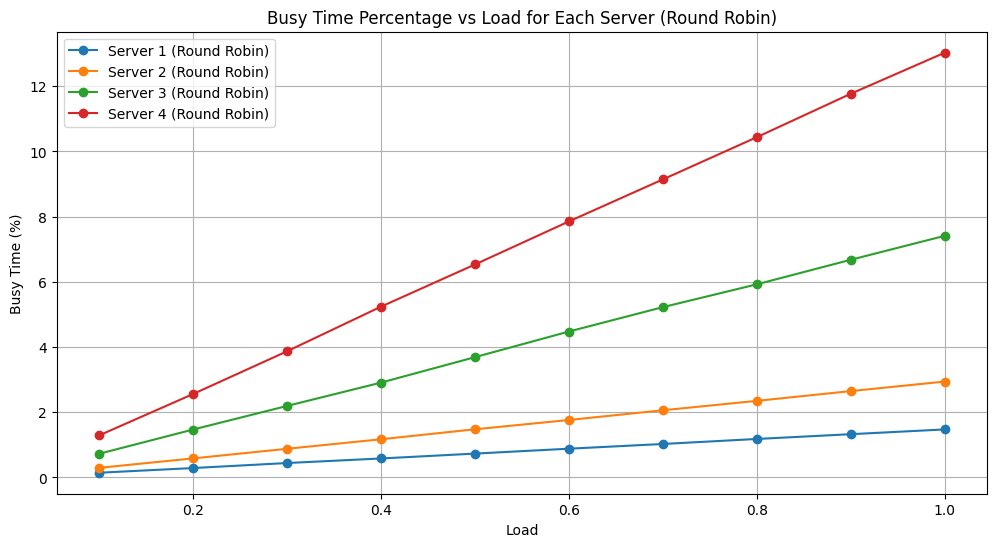

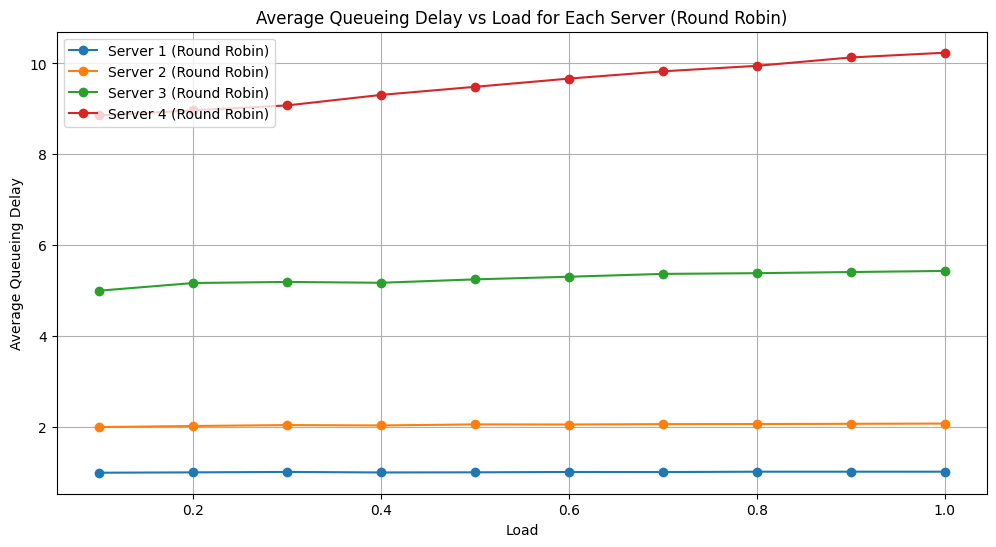

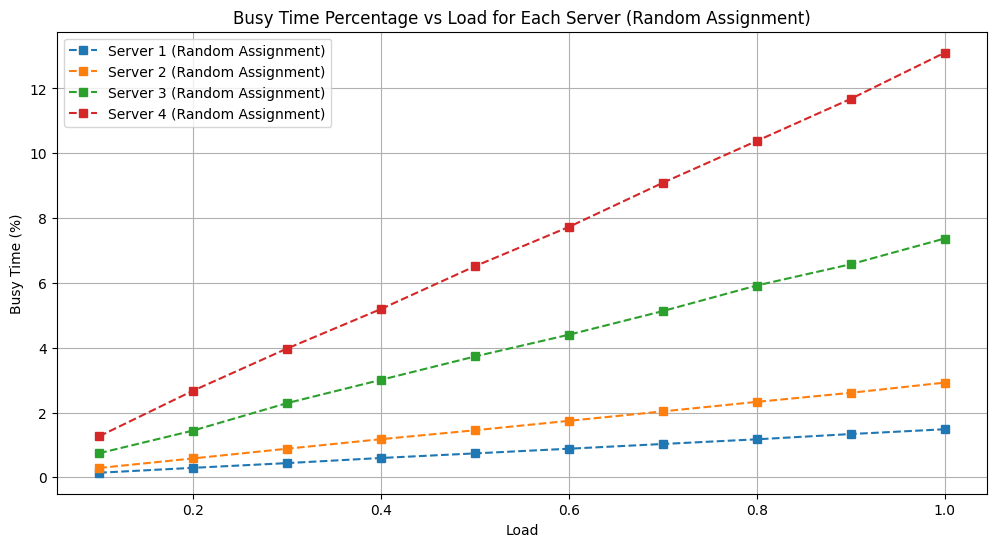

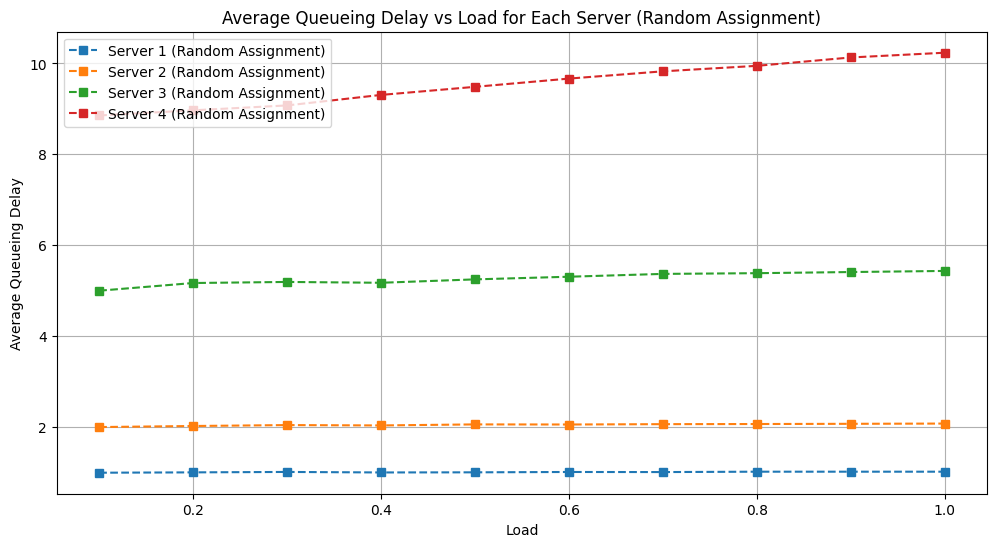

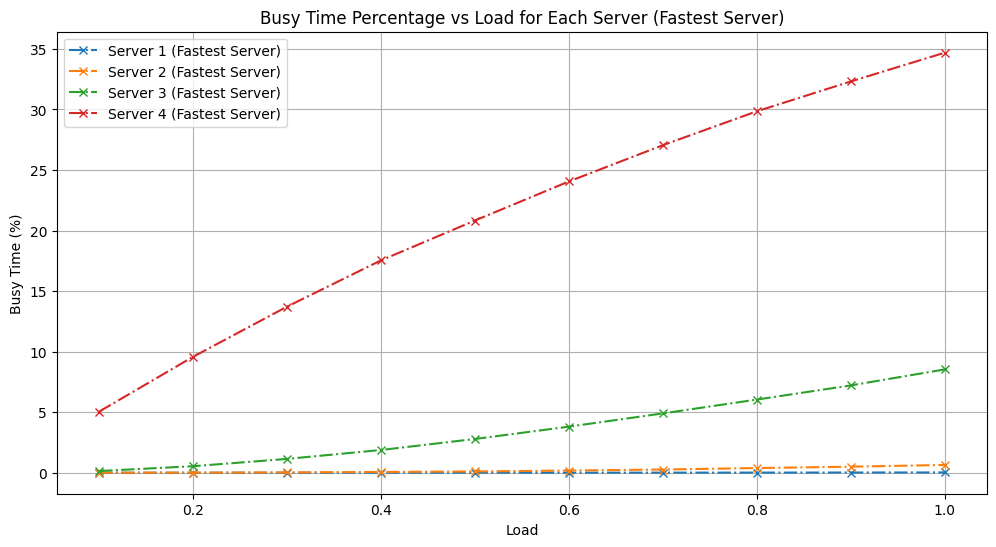

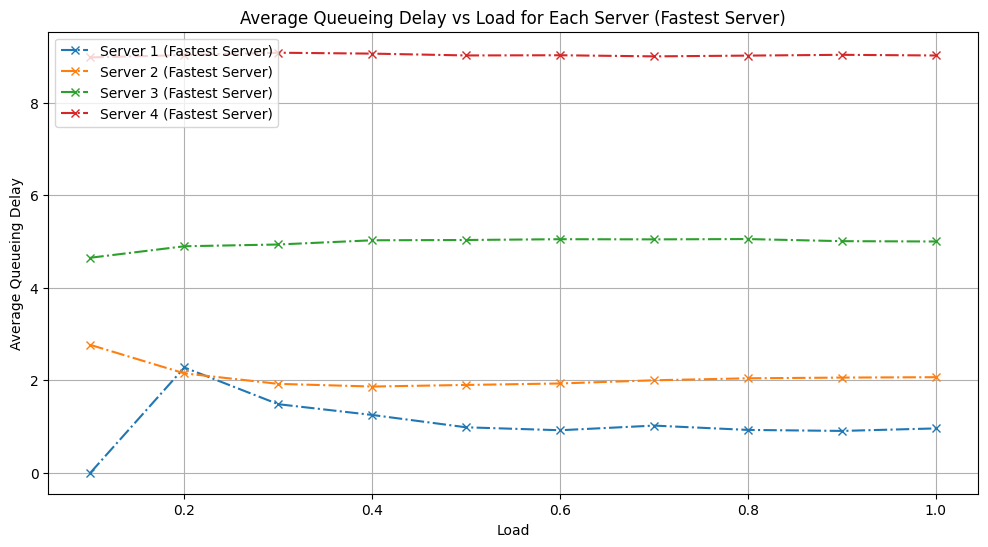

In [1]:
import random
from queue import PriorityQueue
import matplotlib.pyplot as plt

# Constants
SERVICE_RATES = [1.0, 2.0, 5.0, 9.0]
SIM_TIME = 2000000  # Further increased simulation time
TYPE1 = 1

# Global variables
arrivals = 0
users = 0
BusyServer = [False, False, False, False]
MM4 = [[], [], [], []]

# To take the measurements
class Measure:
    def __init__(self, Narr, Ndep, NAveraegUser, OldTimeEvent, AverageDelay, BusyTime1, BusyTime2, BusyTime3, BusyTime4):
        self.arr = Narr
        self.dep = Ndep
        self.ut = NAveraegUser
        self.oldT = OldTimeEvent
        self.delay = AverageDelay
        self.busy1 = BusyTime1
        self.busy2 = BusyTime2
        self.busy3 = BusyTime3
        self.busy4 = BusyTime4
        self.queue_delays = [[], [], [], []]

# Client class
class Client:
    def __init__(self, type, arrival_time):
        self.type = type
        self.arrival_time = arrival_time

# Random server selection for arrival
def arrival(time, FES, queues):
    global users
    global SERVICE_RATES
    global ARRIVAL

    # Cumulate statistics
    data.arr += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time

    # Sample the time until the next event
    inter_arrival = random.expovariate(1.0 / ARRIVAL)

    # Schedule the next arrival
    FES.put((time + inter_arrival, "arrival"))

    users += 1

    # Create a record for the client
    client = Client(TYPE1, time)

    # Randomly assign a server
    server_id = random.randint(0, 3)
    queues[server_id].append(client)

    # If the server is idle, start the service
    if not BusyServer[server_id]:
        BusyServer[server_id] = True

        # Sample the service time based on server's miu
        service_time = random.expovariate(1.0 / SERVICE_RATES[server_id])

        # Schedule when the client will finish the server
        FES.put((time + service_time, f"departure_{server_id}"))

        # Accumulate busy time for the server
        if server_id == 0:
            data.busy1 += service_time
        elif server_id == 1:
            data.busy2 += service_time
        elif server_id == 2:
            data.busy3 += service_time
        elif server_id == 3:
            data.busy4 += service_time

# Departure logic
def departure(time, FES, queues, server_id):
    global users
    global SERVICE_RATES

    # Cumulate statistics
    data.dep += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time

    # Get the first element from the queue
    client = queues[server_id].pop(0)

    # Calculate queueing delay
    delay = time - client.arrival_time
    data.queue_delays[server_id].append(delay)

    # Do whatever we need to do when clients go away
    data.delay += delay
    users -= 1

    # Check if there are more clients in the line
    if len(queues[server_id]) > 0:
        # Sample the service time based on server's miu
        service_time = random.expovariate(1.0 / SERVICE_RATES[server_id])

        # Schedule when the client will finish the server
        FES.put((time + service_time, f"departure_{server_id}"))

        # Accumulate busy time for the server
        if server_id == 0:
            data.busy1 += service_time
        elif server_id == 1:
            data.busy2 += service_time
        elif server_id == 2:
            data.busy3 += service_time
        elif server_id == 3:
            data.busy4 += service_time
    else:
        BusyServer[server_id] = False

# Fastest server selection for arrival
def fastest_server_arrival(time, FES, queues):
    global users
    global SERVICE_RATES
    global ARRIVAL

    # Cumulate statistics
    data.arr += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time

    # Sample the time until the next event
    inter_arrival = random.expovariate(1.0 / ARRIVAL)

    # Schedule the next arrival
    FES.put((time + inter_arrival, "fastest_arrival"))

    users += 1

    # Create a record for the client
    client = Client(TYPE1, time)

    # Select the fastest server with the shortest queue
    server_id = min(range(len(SERVICE_RATES)), key=lambda i: (len(queues[i]), -SERVICE_RATES[i]))
    queues[server_id].append(client)

    # If the server is idle, start the service
    if not BusyServer[server_id]:
        BusyServer[server_id] = True

        # Sample the service time based on server's miu
        service_time = random.expovariate(1.0 / SERVICE_RATES[server_id])

        # Schedule when the client will finish the server
        FES.put((time + service_time, f"fastest_departure_{server_id}"))

        # Accumulate busy time for the server
        if server_id == 0:
            data.busy1 += service_time
        elif server_id == 1:
            data.busy2 += service_time
        elif server_id == 2:
            data.busy3 += service_time
        elif server_id == 3:
            data.busy4 += service_time

# Fastest server departure logic
def fastest_server_departure(time, FES, queues, server_id):
    global users
    global SERVICE_RATES

    # Cumulate statistics
    data.dep += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time

    # Get the first element from the queue
    client = queues[server_id].pop(0)

    # Calculate queueing delay
    delay = time - client.arrival_time
    data.queue_delays[server_id].append(delay)

    # Do whatever we need to do when clients go away
    data.delay += delay
    users -= 1

    # Check if there are more clients in the line
    if len(queues[server_id]) > 0:
        # Sample the service time based on server's miu
        service_time = random.expovariate(1.0 / SERVICE_RATES[server_id])

        # Schedule when the client will finish the server
        FES.put((time + service_time, f"fastest_departure_{server_id}"))

        # Accumulate busy time for the server
        if server_id == 0:
            data.busy1 += service_time
        elif server_id == 1:
            data.busy2 += service_time
        elif server_id == 2:
            data.busy3 += service_time
        elif server_id == 3:
            data.busy4 += service_time
    else:
        BusyServer[server_id] = False

# Function to calculate average queueing delay for Round Robin
def calculate_avg_queue_delay_round_robin(load):
    global ARRIVAL
    ARRIVAL = sum(SERVICE_RATES) / load
    random.seed(42)
    global data
    data = Measure(0, 0, 0, 0, 0, 0, 0, 0, 0)
    time = 0
    global users
    users = 0
    global BusyServer
    BusyServer = [False, False, False, False]
    global MM4
    MM4 = [[], [], [], []]
    FES = PriorityQueue()
    FES.put((0, "arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "arrival":
            arrival(time, FES, MM4)
        elif event_type.startswith("departure"):
            server_id = int(event_type.split("_")[1])
            departure(time, FES, MM4, server_id)

    avg_queue_delays = [sum(delays) / len(delays) if len(delays) > 0 else 0 for delays in data.queue_delays]
    return avg_queue_delays

# Function to calculate average queueing delay for Random Assignment
def calculate_avg_queue_delay_random(load):
    global ARRIVAL
    ARRIVAL = sum(SERVICE_RATES) / load
    random.seed(42)
    global data
    data = Measure(0, 0, 0, 0, 0, 0, 0, 0, 0)
    time = 0
    global users
    users = 0
    global BusyServer
    BusyServer = [False, False, False, False]
    global MM4
    MM4 = [[], [], [], []]
    FES = PriorityQueue()
    FES.put((0, "arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "arrival":
            arrival(time, FES, MM4)
        elif event_type.startswith("departure"):
            server_id = int(event_type.split("_")[1])
            departure(time, FES, MM4, server_id)

    avg_queue_delays = [sum(delays) / len(delays) if len(delays) > 0 else 0 for delays in data.queue_delays]
    return avg_queue_delays

# Function to calculate average queueing delay for Fastest Server
def calculate_avg_queue_delay_fastest(load):
    global ARRIVAL
    ARRIVAL = sum(SERVICE_RATES) / load
    random.seed(42)
    global data
    data = Measure(0, 0, 0, 0, 0, 0, 0, 0, 0)
    time = 0
    global users
    users = 0
    global BusyServer
    BusyServer = [False, False, False, False]
    global MM4
    MM4 = [[], [], [], []]
    FES = PriorityQueue()
    FES.put((0, "fastest_arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "fastest_arrival":
            fastest_server_arrival(time, FES, MM4)
        elif event_type.startswith("fastest_departure"):
            server_id = int(event_type.split("_")[2])
            fastest_server_departure(time, FES, MM4, server_id)

    avg_queue_delays = [sum(delays) / len(delays) if len(delays) > 0 else 0 for delays in data.queue_delays]
    return avg_queue_delays

# Calculate average queueing delays
loads = [i * 0.1 for i in range(1, 11)]
avg_queue_delays_round_robin_all_loads = [calculate_avg_queue_delay_round_robin(load) for load in loads]
avg_queue_delays_random_all_loads = [calculate_avg_queue_delay_random(load) for load in loads]
avg_queue_delays_fastest_all_loads = [calculate_avg_queue_delay_fastest(load) for load in loads]

# Transpose the results to separate delays for each server
avg_queue_delays_round_robin_all_loads = list(zip(*avg_queue_delays_round_robin_all_loads))
avg_queue_delays_random_all_loads = list(zip(*avg_queue_delays_random_all_loads))
avg_queue_delays_fastest_all_loads = list(zip(*avg_queue_delays_fastest_all_loads))

# Plotting
loads = [i * 0.1 for i in range(1, 11)]
busy_times_server1_round_robin = []
busy_times_server2_round_robin = []
busy_times_server3_round_robin = []
busy_times_server4_round_robin = []
busy_times_server1_random = []
busy_times_server2_random = []
busy_times_server3_random = []
busy_times_server4_random = []
busy_times_server1_fastest = []
busy_times_server2_fastest = []
busy_times_server3_fastest = []
busy_times_server4_fastest = []

for load in loads:
    ARRIVAL = sum(SERVICE_RATES) / load
    random.seed(42)

    # Round Robin Simulation
    data = Measure(0, 0, 0, 0, 0, 0, 0, 0, 0)
    time = 0
    users = 0
    BusyServer = [False, False, False, False]
    MM4 = [[], [], [], []]
    FES = PriorityQueue()
    FES.put((0, "arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "arrival":
            arrival(time, FES, MM4)
        elif event_type.startswith("departure"):
            server_id = int(event_type.split("_")[1])
            departure(time, FES, MM4, server_id)

    busy_times_server1_round_robin.append((data.busy1 / SIM_TIME) * 100)
    busy_times_server2_round_robin.append((data.busy2 / SIM_TIME) * 100)
    busy_times_server3_round_robin.append((data.busy3 / SIM_TIME) * 100)
    busy_times_server4_round_robin.append((data.busy4 / SIM_TIME) * 100)

    # Random Assignment Simulation
    data = Measure(0, 0, 0, 0, 0, 0, 0, 0, 0)
    time = 0
    users = 0
    BusyServer = [False, False, False, False]
    MM4 = [[], [], [], []]
    FES = PriorityQueue()
    FES.put((0, "arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "arrival":
            arrival(time, FES, MM4)
        elif event_type.startswith("departure"):
            server_id = int(event_type.split("_")[1])
            departure(time, FES, MM4, server_id)

    busy_times_server1_random.append((data.busy1 / SIM_TIME) * 100)
    busy_times_server2_random.append((data.busy2 / SIM_TIME) * 100)
    busy_times_server3_random.append((data.busy3 / SIM_TIME) * 100)
    busy_times_server4_random.append((data.busy4 / SIM_TIME) * 100)

    # Fastest Server Simulation
    data = Measure(0, 0, 0, 0, 0, 0, 0, 0, 0)
    time = 0
    users = 0
    BusyServer = [False, False, False, False]
    MM4 = [[], [], [], []]
    FES = PriorityQueue()
    FES.put((0, "fastest_arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "fastest_arrival":
            fastest_server_arrival(time, FES, MM4)
        elif event_type.startswith("fastest_departure"):
            server_id = int(event_type.split("_")[2])
            fastest_server_departure(time, FES, MM4, server_id)

    busy_times_server1_fastest.append((data.busy1 / SIM_TIME) * 100)
    busy_times_server2_fastest.append((data.busy2 / SIM_TIME) * 100)
    busy_times_server3_fastest.append((data.busy3 / SIM_TIME) * 100)
    busy_times_server4_fastest.append((data.busy4 / SIM_TIME) * 100)

# Plotting results for Round Robin
plt.figure(figsize=(12, 6))
plt.plot(loads, busy_times_server1_round_robin, label='Server 1 (Round Robin)', marker='o')
plt.plot(loads, busy_times_server2_round_robin, label='Server 2 (Round Robin)', marker='o')
plt.plot(loads, busy_times_server3_round_robin, label='Server 3 (Round Robin)', marker='o')
plt.plot(loads, busy_times_server4_round_robin, label='Server 4 (Round Robin)', marker='o')
plt.xlabel('Load')
plt.ylabel('Busy Time (%)')
plt.title('Busy Time Percentage vs Load for Each Server (Round Robin)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(loads, avg_queue_delays_round_robin_all_loads[0], label='Server 1 (Round Robin)', marker='o')
plt.plot(loads, avg_queue_delays_round_robin_all_loads[1], label='Server 2 (Round Robin)', marker='o')
plt.plot(loads, avg_queue_delays_round_robin_all_loads[2], label='Server 3 (Round Robin)', marker='o')
plt.plot(loads, avg_queue_delays_round_robin_all_loads[3], label='Server 4 (Round Robin)', marker='o')
plt.xlabel('Load')
plt.ylabel('Average Queueing Delay')
plt.title('Average Queueing Delay vs Load for Each Server (Round Robin)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plotting results for Random Assignment
plt.figure(figsize=(12, 6))
plt.plot(loads, busy_times_server1_random, label='Server 1 (Random Assignment)', linestyle='--', marker='s')
plt.plot(loads, busy_times_server2_random, label='Server 2 (Random Assignment)', linestyle='--', marker='s')
plt.plot(loads, busy_times_server3_random, label='Server 3 (Random Assignment)', linestyle='--', marker='s')
plt.plot(loads, busy_times_server4_random, label='Server 4 (Random Assignment)', linestyle='--', marker='s')
plt.xlabel('Load')
plt.ylabel('Busy Time (%)')
plt.title('Busy Time Percentage vs Load for Each Server (Random Assignment)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(loads, avg_queue_delays_random_all_loads[0], label='Server 1 (Random Assignment)', linestyle='--', marker='s')
plt.plot(loads, avg_queue_delays_random_all_loads[1], label='Server 2 (Random Assignment)', linestyle='--', marker='s')
plt.plot(loads, avg_queue_delays_random_all_loads[2], label='Server 3 (Random Assignment)', linestyle='--', marker='s')
plt.plot(loads, avg_queue_delays_random_all_loads[3], label='Server 4 (Random Assignment)', linestyle='--', marker='s')
plt.xlabel('Load')
plt.ylabel('Average Queueing Delay')
plt.title('Average Queueing Delay vs Load for Each Server (Random Assignment)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plotting results for Fastest Server
plt.figure(figsize=(12, 6))
plt.plot(loads, busy_times_server1_fastest, label='Server 1 (Fastest Server)', linestyle='-.', marker='x')
plt.plot(loads, busy_times_server2_fastest, label='Server 2 (Fastest Server)', linestyle='-.', marker='x')
plt.plot(loads, busy_times_server3_fastest, label='Server 3 (Fastest Server)', linestyle='-.', marker='x')
plt.plot(loads, busy_times_server4_fastest, label='Server 4 (Fastest Server)', linestyle='-.', marker='x')
plt.xlabel('Load')
plt.ylabel('Busy Time (%)')
plt.title('Busy Time Percentage vs Load for Each Server (Fastest Server)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(loads, avg_queue_delays_fastest_all_loads[0], label='Server 1 (Fastest Server)', linestyle='-.', marker='x')
plt.plot(loads, avg_queue_delays_fastest_all_loads[1], label='Server 2 (Fastest Server)', linestyle='-.', marker='x')
plt.plot(loads, avg_queue_delays_fastest_all_loads[2], label='Server 3 (Fastest Server)', linestyle='-.', marker='x')
plt.plot(loads, avg_queue_delays_fastest_all_loads[3], label='Server 4 (Fastest Server)', linestyle='-.', marker='x')
plt.xlabel('Load')
plt.ylabel('Average Queueing Delay')
plt.title('Average Queueing Delay vs Load for Each Server (Fastest Server)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Task4

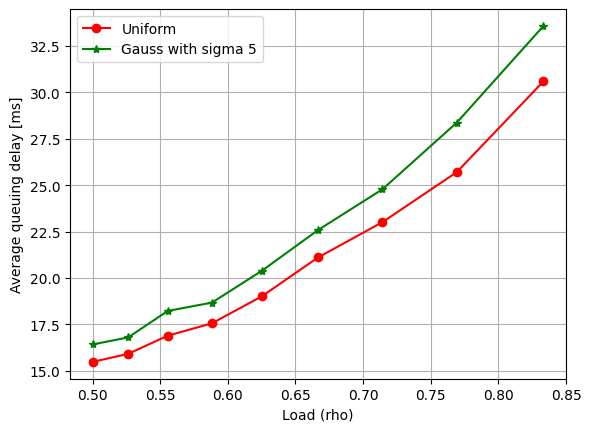

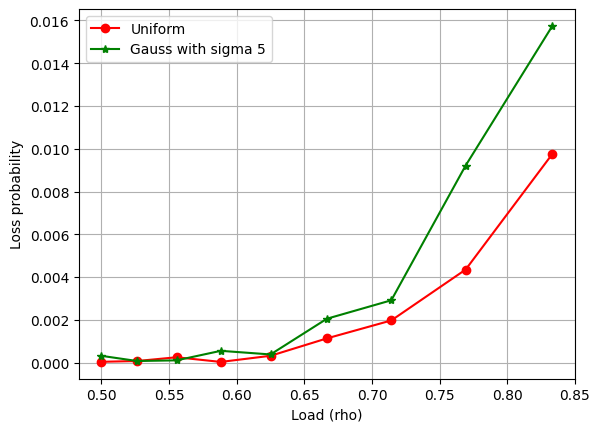

In [1]:
import random
from queue import PriorityQueue
import numpy as np
import matplotlib.pyplot as plt

# ******************************************************************************
# Constants
# ******************************************************************************

SERVICE = 10.0  # Average service time

TYPE1 = 1
arrivals = 0

BusyServer = False  # True: server is currently busy; False: server is currently idle

MM1 = []

# ******************************************************************************
# To take the measurements
# ******************************************************************************
class Measure:
    def __init__(self, Narr, Ndep, NAveraegUser, OldTimeEvent, AverageDelay):
        self.arr = Narr
        self.dep = Ndep
        self.ut = NAveraegUser
        self.oldT = OldTimeEvent
        self.delay = AverageDelay
        self.loss = 0

# ******************************************************************************
# Client
# ******************************************************************************
class Client:
    def __init__(self, type, arrival_time):
        self.type = type
        self.arrival_time = arrival_time

# ******************************************************************************
# Server
# ******************************************************************************
class Server(object):

    # constructor
    def __init__(self):

        # whether the server is idle or not
        self.idle = True

# ******************************************************************************
# Arrivals for Gaussian and Uniform distributions
# ******************************************************************************

def arrival_gauss1(time, FES, queue, Buffersize):  # Gaussian with sigma 5
    global users
    data.arr += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time

    inter_arrival = random.expovariate(lambd=1.0 / ARRIVAL)
    FES.put((time + inter_arrival, "arrival"))

    users += 1
    client = Client(TYPE1, time)
    queue.append(client)

    if users == 1:
        service_time = random.gauss(SERVICE, 5)  # Increased sigma to 5
        FES.put((time + service_time, "departure"))
    elif users >= Buffersize:
        users -= 1
        queue.pop()
        data.loss += 1

def arrival_uniform(time, FES, queue, Buffersize):  # Uniform
    global users
    data.arr += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time

    inter_arrival = random.expovariate(lambd=1.0 / ARRIVAL)
    FES.put((time + inter_arrival, "arrival"))

    users += 1
    client = Client(TYPE1, time)
    queue.append(client)

    if users == 1:
        service_time = random.uniform(SERVICE - 5, SERVICE + 5)  # Uniform distribution
        FES.put((time + service_time, "departure"))
    elif users >= Buffersize:
        users -= 1
        queue.pop()
        data.loss += 1

# ******************************************************************************
# Departures for Gaussian and Uniform distributions
# ******************************************************************************

def departure_gauss1(time, FES, queue):  # Gaussian with sigma 5
    global users
    data.dep += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time
    client = queue.pop(0)
    data.delay += (time - client.arrival_time)
    users -= 1

    if users > 0:
        service_time = random.gauss(SERVICE, 5)  # Increased sigma to 5
        FES.put((time + service_time, "departure"))

def departure_uniform(time, FES, queue):  # Uniform
    global users
    data.dep += 1
    data.ut += users * (time - data.oldT)
    data.oldT = time
    client = queue.pop(0)
    data.delay += (time - client.arrival_time)
    users -= 1

    if users > 0:
        service_time = random.uniform(SERVICE - 5, SERVICE + 5)  # Uniform distribution
        FES.put((time + service_time, "departure"))

# ******************************************************************************
# Simulation results for different distributions
# ******************************************************************************

def statistical_result_gauss1(seed, ARRIVAL):
    global users
    global load
    time = 0
    load = SERVICE / ARRIVAL
    FES = PriorityQueue()
    FES.put((0, "arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "arrival":
            arrival_gauss1(time, FES, MM1, Buffersize)
        elif event_type == "departure":
            departure_gauss1(time, FES, MM1)
    return load, data.delay / data.dep, data.loss / data.arr

def statistical_result_uniform(seed, ARRIVAL):
    global users
    global load
    time = 0
    load = SERVICE / ARRIVAL
    FES = PriorityQueue()
    FES.put((0, "arrival"))

    while time < SIM_TIME:
        (time, event_type) = FES.get()
        if event_type == "arrival":
            arrival_uniform(time, FES, MM1, Buffersize)
        elif event_type == "departure":
            departure_uniform(time, FES, MM1)
    return load, data.delay / data.dep, data.loss / data.arr

# Data collection
load_list_uni = []
avgdelay_list_uni = []
lossprob_list_uni = []

SIM_TIME = 500000
for ARRIVAL in range(12, 21, 1):
    MM1 = []
    Buffersize = 10
    users = 0
    data = Measure(0, 0, 0, 0, 0)
    load_uni, avgdelay_uni, lossprob_uni = statistical_result_uniform(42, ARRIVAL)
    avgdelay_list_uni.append(avgdelay_uni)
    lossprob_list_uni.append(lossprob_uni)
    load_list_uni.append(load_uni)

load_list_gau1 = []
avgdelay_list_gau1 = []
lossprob_list_gau1 = []

for ARRIVAL in range(12, 21, 1):
    MM1 = []
    Buffersize = 10
    users = 0
    data = Measure(0, 0, 0, 0, 0)
    load_gau1, avgdelay_gau1, lossprob_gau1 = statistical_result_gauss1(42, ARRIVAL)
    avgdelay_list_gau1.append(avgdelay_gau1)
    lossprob_list_gau1.append(lossprob_gau1)
    load_list_gau1.append(load_gau1)

# Plotting
plt.figure(1)
plt.plot(load_list_uni, avgdelay_list_uni, color='r', marker='o', label='Uniform')
plt.plot(load_list_gau1, avgdelay_list_gau1, color='g', marker='*', label='Gauss with sigma 5')
plt.xlabel("Load (rho)")
plt.ylabel("Average queuing delay [ms]")
plt.legend()
plt.grid()
plt.savefig("task4a-average_queuing_delay.png", dpi=300)

# New plot for loss probability
plt.figure(2)
plt.plot(load_list_uni, lossprob_list_uni, color='r', marker='o', label='Uniform')
plt.plot(load_list_gau1, lossprob_list_gau1, color='g', marker='*', label='Gauss with sigma 5')
plt.xlabel("Load (rho)")
plt.ylabel("Loss probability")
plt.legend()
plt.grid()
plt.savefig("task4a-loss_probability.png", dpi=300)

plt.show()
